In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Assuming your data files are saved in "(your current directory)/io/" folder. 

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Donation ID,Donor ID,Donation Amount,Donation Received Date,# of Donations Made,min,max,Total Sum Donated,Donor State,Donor Is Teacher,...,School State,# Donations Received,Total Donation Amt Received,Teacher Project Posted Sequence,Project Title,Project Subject Category Tree,Project Subject Subcategory Tree,Project Resource Category,Project Current Status,Resource Vendor Name
0,579821d4de7922dd32ae6aa9f1e67fd9,00070fd37d3e8b5b7c08a4a0ba22aba1,50.00,2016-01-18 18:40:29,29,10.00,150.0,1560.00,Oklahoma,No,...,Oklahoma,8,375.00,5,Science Lab Supplies,Math & Science,"Applied Sciences, Health & Life Science",Supplies,Expired,"Carolina Biological Supply Company,Carolina Bi..."
1,f2bbdba4619801071b2e97a483ff2c71,00070fd37d3e8b5b7c08a4a0ba22aba1,50.00,2017-09-17 12:46:24,29,10.00,150.0,1560.00,Oklahoma,No,...,Oklahoma,6,370.13,2,Your Epidermis is Showing...Your Art!,Music & The Arts,Visual Arts,Supplies,Fully Funded,"Amazon Business,Amazon Business"
2,886fdf2feda0118c8f2adcac7b15b0e4,0015dc157335e5ad6f569e5264bbf33e,50.00,2016-01-10 10:11:22,22,10.00,2700.0,4505.86,Maryland,Yes,...,Maryland,5,718.28,20,Shine Some Light on the Subject!,"Special Needs, Music & The Arts","Special Needs, Visual Arts",Supplies,Fully Funded,"Amazon Business,Amazon Business,Amazon Busines..."
3,02216d6d22189b292fd6285285b95c12,0015dc157335e5ad6f569e5264bbf33e,41.00,2013-04-24 16:23:11,22,10.00,2700.0,4505.86,Maryland,Yes,...,Maryland,2,143.16,11,Repetition With Excitement!,"Applied Learning, Special Needs","Early Development, Special Needs",Books,Fully Funded,"AKJ Education,AKJ Education,AKJ Education,AKJ ..."
4,7798f746c2956bfd29f394b5b127e6a4,00199e3565635f8a5ebefd3b5985a7f3,238.65,2018-01-25 08:57:10,215,11.24,1116.4,46502.98,Massachusetts,No,...,Massachusetts,1,238.65,3,Teaching Kids Sports,Health & Sports,"Health & Wellness, Team Sports",Sports & Exercise Equipment,Fully Funded,"School Specialty,Staples Advantage,School Spec..."


## Identify Key Variables using Factor Analysis for Mixed Data

In [3]:
cosine_df = train[['Donor ID','Project ID','Donation Amount','Donor State','Donor Is Teacher','Project Grade Level Category','Project Cost','School Metro Type','School State','# Donations Received','Total Donation Amt Received','Teacher Project Posted Sequence','Project Subject Category Tree','Project Subject Subcategory Tree','Project Resource Category','Resource Vendor Name']]
cosine_df.head()

,Donor ID,Project ID,Donation Amount,Donor State,Donor Is Teacher,Project Grade Level Category,Project Cost,School Metro Type,School State,# Donations Received,Total Donation Amt Received,Teacher Project Posted Sequence,Project Subject Category Tree,Project Subject Subcategory Tree,Project Resource Category,Resource Vendor Name
0,00070fd37d3e8b5b7c08a4a0ba22aba1,857f4517b5e2aacf6899e489936ec5a8,50.00,Oklahoma,No,Grades 6-8,1113.15,suburban,Oklahoma,8,375.00,5,Math & Science,"Applied Sciences, Health & Life Science",Supplies,"Carolina Biological Supply Company,Carolina Bi..."
1,00070fd37d3e8b5b7c08a4a0ba22aba1,eddfdd15f9c22fe23b306b7f54918c81,50.00,Oklahoma,No,Grades 9-12,388.52,suburban,Oklahoma,6,370.13,2,Music & The Arts,Visual Arts,Supplies,"Amazon Business,Amazon Business"
2,0015dc157335e5ad6f569e5264bbf33e,52f352059701bb7c54990de75f9c108d,50.00,Maryland,Yes,Grades PreK-2,728.87,urban,Maryland,5,718.28,20,"Special Needs, Music & The Arts","Special Needs, Visual Arts",Supplies,"Amazon Business,Amazon Business,Amazon Busines..."
3,0015dc157335e5ad6f569e5264bbf33e,ded87d79ea309cb47686ed54bf4f3f2d,41.00,Maryland,Yes,Grades PreK-2,426.35,urban,Maryland,2,143.16,11,"Applied Learning, Special Needs","Early Development, Special Needs",Books,"AKJ Education,AKJ Education,AKJ Education,AKJ ..."
4,00199e3565635f8a5ebefd3b5985a7f3,3faed6ae4805456447f2b9f22cf0c950,238.65,Massachusetts,No,Grades 3-5,561.53,urban,Massachusetts,1,238.65,3,Health & Sports,"Health & Wellness, Team Sports",Sports & Exercise Equipment,"School Specialty,Staples Advantage,School Spec..."


In [4]:
cosine_df['Amount Needed'] = cosine_df['Project Cost'] - cosine_df['Total Donation Amt Received']
cols_to_drop = ['Donation Amount','Project Cost','Total Donation Amt Received']
cosine_df_final = cosine_df[cosine_df.columns.drop(cols_to_drop)]
cosine_df_final.head()

c:\users\me\desktop\pythonapp\testprojs\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Donor ID,Project ID,Donor State,Donor Is Teacher,Project Grade Level Category,School Metro Type,School State,# Donations Received,Teacher Project Posted Sequence,Project Subject Category Tree,Project Subject Subcategory Tree,Project Resource Category,Resource Vendor Name,Amount Needed
0,00070fd37d3e8b5b7c08a4a0ba22aba1,857f4517b5e2aacf6899e489936ec5a8,Oklahoma,No,Grades 6-8,suburban,Oklahoma,8,5,Math & Science,"Applied Sciences, Health & Life Science",Supplies,"Carolina Biological Supply Company,Carolina Bi...",738.15
1,00070fd37d3e8b5b7c08a4a0ba22aba1,eddfdd15f9c22fe23b306b7f54918c81,Oklahoma,No,Grades 9-12,suburban,Oklahoma,6,2,Music & The Arts,Visual Arts,Supplies,"Amazon Business,Amazon Business",18.39
2,0015dc157335e5ad6f569e5264bbf33e,52f352059701bb7c54990de75f9c108d,Maryland,Yes,Grades PreK-2,urban,Maryland,5,20,"Special Needs, Music & The Arts","Special Needs, Visual Arts",Supplies,"Amazon Business,Amazon Business,Amazon Busines...",10.59
3,0015dc157335e5ad6f569e5264bbf33e,ded87d79ea309cb47686ed54bf4f3f2d,Maryland,Yes,Grades PreK-2,urban,Maryland,2,11,"Applied Learning, Special Needs","Early Development, Special Needs",Books,"AKJ Education,AKJ Education,AKJ Education,AKJ ...",283.19
4,00199e3565635f8a5ebefd3b5985a7f3,3faed6ae4805456447f2b9f22cf0c950,Massachusetts,No,Grades 3-5,urban,Massachusetts,1,3,Health & Sports,"Health & Wellness, Team Sports",Sports & Exercise Equipment,"School Specialty,Staples Advantage,School Spec...",322.88


In [5]:
len(cosine_df_final.columns)

14

In [6]:
variables_drop = ['Donor ID','Project ID']
variable_df = cosine_df_final[cosine_df_final.columns.drop(variables_drop)]

import prince
famd = prince.FAMD(n_components=2,n_iter=3,copy=True,engine='auto',random_state=42)
famdfit = famd.fit(variable_df)
famdfit.transform(variable_df).head() #Each column stands for a principal component whilst each row stands a row in the original dataset

,0,1
0,403.030051,179.963146
1,391.668027,187.864836
2,509.153580,-219.005118
3,440.123622,-170.469863
4,386.907735,267.095489


In [7]:
variable_df.head()

,Donor State,Donor Is Teacher,Project Grade Level Category,School Metro Type,School State,# Donations Received,Teacher Project Posted Sequence,Project Subject Category Tree,Project Subject Subcategory Tree,Project Resource Category,Resource Vendor Name,Amount Needed
0,Oklahoma,No,Grades 6-8,suburban,Oklahoma,8,5,Math & Science,"Applied Sciences, Health & Life Science",Supplies,"Carolina Biological Supply Company,Carolina Bi...",738.15
1,Oklahoma,No,Grades 9-12,suburban,Oklahoma,6,2,Music & The Arts,Visual Arts,Supplies,"Amazon Business,Amazon Business",18.39
2,Maryland,Yes,Grades PreK-2,urban,Maryland,5,20,"Special Needs, Music & The Arts","Special Needs, Visual Arts",Supplies,"Amazon Business,Amazon Business,Amazon Busines...",10.59
3,Maryland,Yes,Grades PreK-2,urban,Maryland,2,11,"Applied Learning, Special Needs","Early Development, Special Needs",Books,"AKJ Education,AKJ Education,AKJ Education,AKJ ...",283.19
4,Massachusetts,No,Grades 3-5,urban,Massachusetts,1,3,Health & Sports,"Health & Wellness, Team Sports",Sports & Exercise Equipment,"School Specialty,Staples Advantage,School Spec...",322.88


In [8]:
famdfit.transform(variable_df).tail()

,0,1
35010,330.224557,267.757340
35011,408.576513,227.123827
35012,439.960692,282.978944
35013,466.238719,182.822516
35014,399.191191,213.847594


In [10]:
len(variable_df.columns)

12

In [11]:
famdfit.cat_one_hots_.items()

dict_items([('Categorical', OneHotEncoder())])

In [12]:
dir(famdfit)

['U_',
 'V_',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_X_global',
 '_check_and_prepare_input',
 '_get_param_names',
 '_row_coordinates_from_global',
 'all_nums_',
 'cat_one_hots_',
 'column_correlations',
 'copy',
 'eigenvalues_',
 'engine',
 'explained_inertia_',
 'fit',
 'fit_transform',
 'get_params',
 'groups',
 'n_components',
 'n_iter',
 'normalize',
 'partial_factor_analysis_',
 'partial_row_coordinates',
 'plot_partial_row_coordinates',
 'plot_row_coordinates',
 'random_state',
 'rescale_with_mean',
 'rescale_with_std',
 'row_contributions',
 'row_coordinates',
 'row_cosine_similarities',
 'row_standard_coordinat

In [13]:
famdfit.groups['Categorical']


['Project Resource Category',
 'Donor Is Teacher',
 'Resource Vendor Name',
 'Donor State',
 'Project Subject Subcategory Tree',
 'School Metro Type',
 'School State',
 'Project Grade Level Category',
 'Project Subject Category Tree']

In [ ]:
famdfit.groups['Numerical']

In [ ]:
sorted(famdfit.groups)

In [17]:
for name, fa in sorted(famdfit.partial_factor_analysis_.items()):  # doctest: +ELLIPSIS
    print('{} eigenvalues: {}'.format(name, fa.eigenvalues_))
    print(len(fa.eigenvalues_))

Categorical eigenvalues: [0.289888990767799, 0.2509419821618977]
2
Numerical eigenvalues: [1.1224184672202926, 1.003677035083627]
2


# Number of categorical eigenvalues don't match up to number fo categorical items

In [ ]:
famdfit.groups['Numerical'] 

In [14]:
dir(famdfit.partial_factor_analysis_)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [ ]:
dir(famdfit.partial_factor_analysis_.items())

In [ ]:
dir(famdfit.partial_factor_analysis_['Categorical'])

Text(0,0.5,'cumulative explained variance')

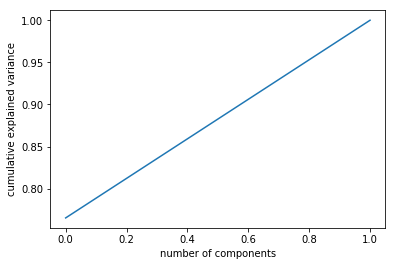

In [16]:
plt.plot(np.cumsum(normed))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [37]:
famdfit.partial_factor_analysis_['Categorical'].s_

array([0.54970846, 0.51335917, 0.50505482, 0.49011785, 0.48774162,
       0.48244004, 0.47886495, 0.47720407, 0.47528023, 0.47271798,
       0.46781925, 0.46351184, 0.45914023])

In [33]:
famdfit.partial_factor_analysis_['Categorical'].total_inertia_

550.0

In [15]:
variable_contribution = famdfit.explained_inertia_
normed = [i/sum(variable_contribution) for i in variable_contribution]
header_list = list(variable_df.columns.values)
variable_contribution_df = pd.DataFrame([normed]) #,columns=header_list)
variable_contribution_df.head()
#The explained inertia represents the percentage of the inertia each principal component contributes. It sums up to 1 if the n_components property is equal to the number of columns in the original dataset. you The explained inertia is obtained by dividing the eigenvalues obtained with the SVD by the total inertia, both of which are also accessible.
#pca.eigenvalues_
#pca.total_inertia_

,0,1
0,0.765339,0.234661


In [ ]:
famdfit.eigenvalues_/famdfit.total_inertia_

In [ ]:
famdfit.partial_row_coordinates(variable_df) 

In [40]:
dir(famdfit.eigenvalues_)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [ ]:
famdfit.total_inertia_

In [ ]:
famdfit.explained_inertia_

In [40]:
#https://plot.ly/ipython-notebooks/principal-component-analysis/#pca-and-dimensionality-reduction
#https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

testing_df = variable_df.drop(['Project Grade Level Category', 'Project Subject Category Tree', 'Project Subject Subcategory Tree'], axis=1)

testing_df = testing_df.drop(['Resource Vendor Name','Project Resource Category'], axis=1).copy()

testing_df.head()
testing_df =pd.get_dummies(testing_df)

# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(testing_df),columns = testing_df.columns) 

pca = PCA(n_components=5)
pca.fit_transform(data_scaled)
#eigenvectors
pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2', 'PC-3', 'PC-4', 'PC-5'])

c:\users\me\desktop\pythonapp\testprojs\venv\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  del sys.path[0]


,# Donations Received,Teacher Project Posted Sequence,Amount Needed,Donor State_Alabama,Donor State_Alaska,Donor State_Arizona,Donor State_Arkansas,Donor State_California,Donor State_Colorado,Donor State_Connecticut,...,School State_South Dakota,School State_Tennessee,School State_Texas,School State_Utah,School State_Vermont,School State_Virginia,School State_Washington,School State_West Virginia,School State_Wisconsin,School State_Wyoming
PC-1,0.246321,0.177383,-0.001086,0.061917,-0.029919,-0.032071,0.037861,-0.060237,-0.062048,0.009734,...,0.005977,0.077185,0.005352,-0.018540,0.023217,-0.010152,-0.067383,-0.001236,0.053030,-0.000545
PC-2,-0.097393,-0.219794,-0.011594,0.041324,-0.048230,0.005088,0.022207,-0.221108,0.036033,-0.030040,...,0.018886,0.010756,0.011542,0.066477,0.029086,0.013633,0.062224,0.078749,-0.009693,0.026334
PC-3,0.108004,0.029496,0.060977,-0.050145,-0.029040,-0.052899,-0.026781,0.448547,-0.012203,-0.017624,...,-0.056462,-0.054409,-0.060496,0.069878,-0.066756,-0.017827,0.002399,-0.048105,-0.143726,-0.022859
PC-4,0.054610,0.141920,0.009511,0.006155,-0.005406,-0.092739,0.060823,0.261048,-0.013797,-0.020263,...,0.044035,0.013434,-0.115701,-0.122578,0.100449,-0.021550,-0.087603,-0.008948,0.014954,0.052503
PC-5,0.043893,-0.077178,0.023872,0.069668,-0.085002,0.055094,0.056499,0.112564,-0.016874,-0.100628,...,0.035408,-0.051179,0.040619,0.071112,0.028509,0.047047,-0.366006,0.164454,0.095224,0.011112


In [42]:
#https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca/31941631#31941631
#eigenvalues
eigenvalues = pca.explained_variance_
eigenvalues

array([2.44000107, 2.04192241, 1.85554734, 1.67851863, 1.59112792])